<H1>Machine learning for Geo-spatial data analysis</H1>

<H3>Example Code Snippet</H3>

<H2>Crime Prediction by Location and Time</H2>

The objective is to build a predictive model that can anticipate the likelihood of a crime occurring at a specific location during a given time period.

In [1]:
# Install these libraries if you don't have them already
"""
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
"""

'\n!pip install pandas\n!pip install scikit-learn\n!pip install matplotlib\n!pip install seaborn\n'

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
# Read the data file (crime_Incidents_2016.csv)

file_path = 'crime_incidents_2016.csv'

# Read the CSV file into a pandas DataFrame
crime_data = pd.read_csv(file_path)
crime_data.columns = crime_data.columns.str.lower()

In [4]:
# Data Preprocessing

# Convert date-related columns to datetime objects
crime_data['reportdatetime'] = pd.to_datetime(crime_data['reportdatetime'])
crime_data['start_date'] = pd.to_datetime(crime_data['start_date'])
crime_data['end_date'] = pd.to_datetime(crime_data['end_date'])

# Extract additional temporal features
crime_data['day_of_week'] = crime_data['reportdatetime'].dt.dayofweek
crime_data['month'] = crime_data['reportdatetime'].dt.month

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
crime_data['shift'] = le.fit_transform(crime_data['shift'])
crime_data['district'] = le.fit_transform(crime_data['district'])
crime_data['neighborhoodcluster'] = le.fit_transform(crime_data['neighborhoodcluster'])

# Create a binary target variable 'crime_occurred' based on the 'offense' column
crime_data['crime_occurred'] = crime_data['offense'].apply(lambda x: 1 if x != 'No Crime' else 0)

In [5]:
# Feature Selection
features = ['longitude', 'latitude', 'shift', 'district', 'neighborhoodcluster', 'day_of_week', 'month']
X = crime_data[features]
y = crime_data['crime_occurred']  # Target variable

In [6]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Model Training and Prediction (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3171

    accuracy                           1.00      3171
   macro avg       1.00      1.00      1.00      3171
weighted avg       1.00      1.00      1.00      3171



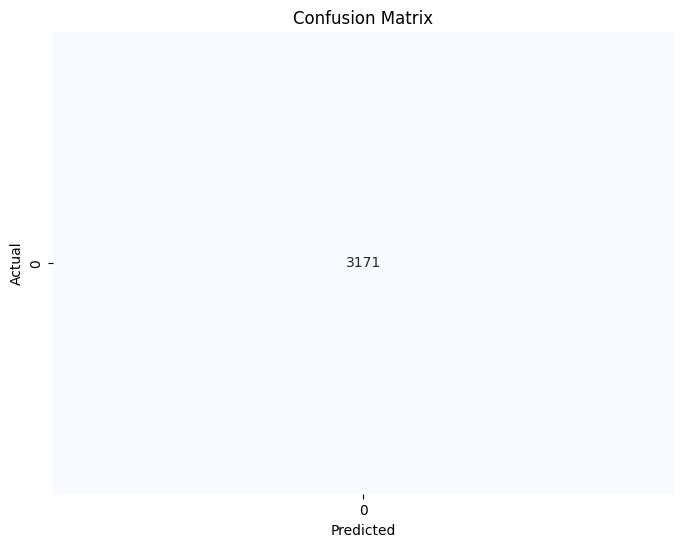

In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

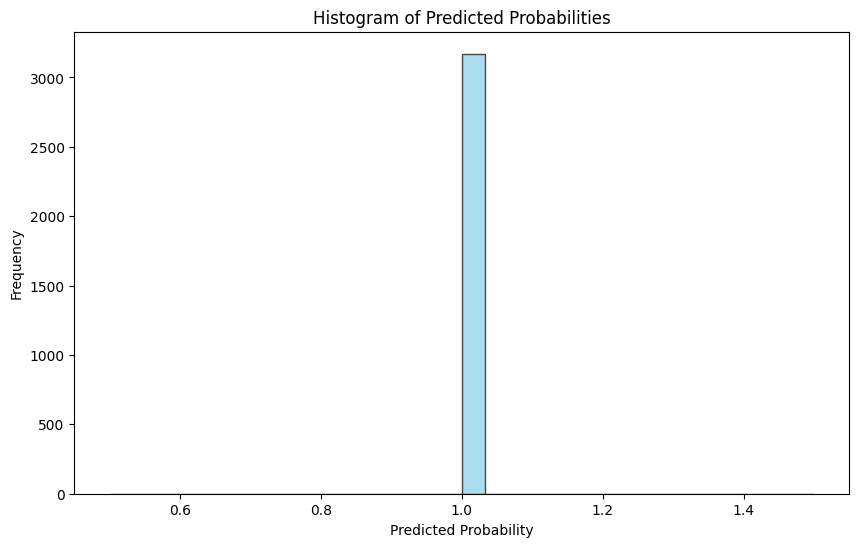

In [9]:
# Visualize the distribution of predicted probabilities
y_prob = model.predict_proba(X_test)

# Ensure that y_prob has the expected shape and contains probabilities
if y_prob.shape[1] > 1:
    y_prob_positive = y_prob[:, 1]
else:
    y_prob_positive = y_prob

# Histogram of predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(y_prob_positive, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()